In [19]:
from collections import defaultdict

def swap(a, i, j):
    temp = a[i]
    a[i] = a[j]
    a[j] = temp

def max_heapify(H, i, heap_size):
    l = 2*i + 1
    r = 2*i + 2
    largest = i
    
    if(l<heap_size and H[l][1]>H[largest][1]):
        largest = l
    if(r<heap_size and H[r][1]>H[largest][1]):
        largest = r
    
    if(largest != i):
        swap(H, i, largest)
        max_heapify(H, largest, heap_size)
    return
    
def build_heap(W):
    H = []
    heap_size = len(W)
    for edge in W:
        H.append((edge, W[edge]))
    
    for i in reversed(range(heap_size//2)):
        max_heapify(H, i, heap_size)
        
    return H 

def heapsort(H):
    heap_size = len(H)
    
    for i in reversed(range(1,len(H))):
        swap(H, 0, heap_size-1)
        heap_size -=1
        max_heapify(H, 0, heap_size)
    return H    
    
def build_heap_and_get_sorted_array(W):
    return heapsort(build_heap(W))
    
class SetMember():
    def __init__(self, value):
        self.p = self
        self.value = value
        self.rank = 0

def find_set(x):
    if(x != x.p):
        x.p = find_set(x.p)
    return x.p

def link(x, y):
    if(x.rank > y.rank):
        y.p = x
        
    else:
        x.p = y
        if(x.rank==y.rank):
            y.rank += 1
        
def union(x, y):
    link(find_set(x), find_set(y))

In [20]:
def MST_Kruskel(G):
    V = set()
    W = defaultdict(lambda:float("infinity"))
    
    for tup in G:
        V.add(tup[0])
        V.add(tup[1])
        W[(tup[0], tup[1])] = tup[2]
    
    set_member_objects = dict()
    for v in V:
        set_member_objects[v] = SetMember(v)
        
    sorted_edges = build_heap_and_get_sorted_array(W)
    A = []
    mst_cost = 0
    for ((u,v), w) in sorted_edges:
        if(find_set(set_member_objects[u]) != find_set(set_member_objects[v])):
            A.append((u, v))
            mst_cost += W[(u, v)]
            union(set_member_objects[u], set_member_objects[v])

    return (mst_cost, A)        

In [22]:
#G = [(0,1,1), (0,2,5), (1,2,1), (2,3,2), (1,3,6)]
#G = [(0, 1, 2), (0, 3, 6), (1, 2, 3), (1, 3, 8), (1, 4, 5), (2, 4, 7), (3, 4, 9)]
#MST_Kruskel(G)

(16, [(0, 1), (1, 2), (1, 4), (0, 3)])

In [46]:
class PriorityQueue():
    def swap_node_idxs_in_map(self, n_1, n_2):
        temp = self.node_to_idx[n_1]
        self.node_to_idx[n_1] = self.node_to_idx[n_2]
        self.node_to_idx[n_2] = temp
        
    def swap(self, i, j):
        temp = self.H[i]
        self.H[i] = self.H[j]
        self.H[j] = temp
        self.swap_node_idxs_in_map(self.H[i][0], self.H[j][0])
        
    def min_heapify(self, i):
        l = 2*i + 1
        r = 2*i + 2
        least = i
        
        if(l<self.heap_size and self.H[l][1]<self.H[least][1]):
            least = l
        
        if(r<self.heap_size and self.H[r][1]<self.H[least][1]):
            least = r
            
        if(least != i):
            self.swap(i, least)
            self.min_heapify(least)
        return    
        
    def build_heap(self):
        for i in reversed(range(self.heap_size//2)):
            self.min_heapify(i)
    
    def extract_min(self):
        self.swap(0, self.heap_size-1)
        self.heap_size -= 1
        self.min_heapify(0)
        return self.H[self.heap_size][0]
    
    def decrease_key(self, v, updated_key):
        i = self.node_to_idx[v]
        self.H[i] = (v, updated_key)
        
        p = (i-1)//2
        while(p>=0 and self.H[i][1]<self.H[p][1]):
            self.swap(i, p)
            i = p
            p = (i-1)//2
        print('after decrease key', self.H.copy())    
            
    def __init__(self, keys_dict):
        self.node_to_idx = dict()
        self.heap_size = len(keys_dict)
        self.H = []
        
        i=0
        for n in keys_dict:
            self.H.append((n, keys_dict[n]))
            self.node_to_idx[n] = i
            i += 1
            
        self.build_heap()

def MST_Prim(G):
    r = 'a'
    adj_list = defaultdict(lambda:[])
    edge_weights = defaultdict(lambda:float("infinity"))
    
    for tup in G:
        adj_list[tup[0]].append(tup[1])
        adj_list[tup[1]].append(tup[0])
        edge_weights[(tup[0], tup[1])] = tup[2]
        edge_weights[(tup[1], tup[0])] = tup[2]
        
    keys_dict = defaultdict(lambda: float("infinity"))
    ancestor = defaultdict(lambda:None)
    node_in_Q = dict()
    
    for n in adj_list:
        keys_dict[n] = float("infinity")
        ancestor[n] = None
        node_in_Q[n] = 1
    
    keys_dict[r] = 0
    Q = PriorityQueue(keys_dict)
    A = []
    mst_cost = 0
    
    while(Q.heap_size != 0):
        u = Q.extract_min()
        node_in_Q[u] = 0

        for v in adj_list[u]:
            if(node_in_Q[v] and edge_weights[(u, v)]<keys_dict[v]):
                ancestor[v] = u
                keys_dict[v] = edge_weights[(u, v)]
                Q.decrease_key(v, edge_weights[(u, v)])
        
        if(ancestor[u] != None):
            A.append((ancestor[u], u))
            mst_cost += edge_weights[(ancestor[u], u)]
    
    return (mst_cost, A)        

In [47]:
#G = [(0,1,1), (0,2,5), (1,2,1), (2,3,2), (1,3,6)]
G = [('a','b',4), ('a','h',8), 
     ('b','c',8), ('b','h',11), 
     ('c','i',2), ('c','f',4), ('c','d',7),
     ('d','f',14), ('d','e',9),
     ('e','f',10),
     ('i','h',7), ('i','g',6),
     ('h','g',1), 
     ('g','f',2),
     ('i','h',7)]
MST_Prim(G)

after decrease key [('b', 4), ('g', inf), ('h', inf), ('c', inf), ('i', inf), ('f', inf), ('d', inf), ('e', inf), ('a', 0)]
after decrease key [('b', 4), ('g', inf), ('h', 8), ('c', inf), ('i', inf), ('f', inf), ('d', inf), ('e', inf), ('a', 0)]
after decrease key [('h', 8), ('c', 8), ('e', inf), ('g', inf), ('i', inf), ('f', inf), ('d', inf), ('b', 4), ('a', 0)]
after decrease key [('i', 7), ('c', 8), ('e', inf), ('g', inf), ('d', inf), ('f', inf), ('h', 8), ('b', 4), ('a', 0)]
after decrease key [('g', 1), ('i', 7), ('e', inf), ('c', 8), ('d', inf), ('f', inf), ('h', 8), ('b', 4), ('a', 0)]
after decrease key [('i', 6), ('c', 8), ('e', inf), ('f', inf), ('d', inf), ('g', 1), ('h', 8), ('b', 4), ('a', 0)]
after decrease key [('f', 2), ('i', 6), ('e', inf), ('c', 8), ('d', inf), ('g', 1), ('h', 8), ('b', 4), ('a', 0)]
after decrease key [('c', 4), ('i', 6), ('e', inf), ('d', inf), ('f', 2), ('g', 1), ('h', 8), ('b', 4), ('a', 0)]
after decrease key [('c', 4), ('i', 6), ('e', inf), ('d'

(37,
 [('a', 'b'),
  ('a', 'h'),
  ('h', 'g'),
  ('g', 'f'),
  ('f', 'c'),
  ('c', 'i'),
  ('c', 'd'),
  ('d', 'e')])

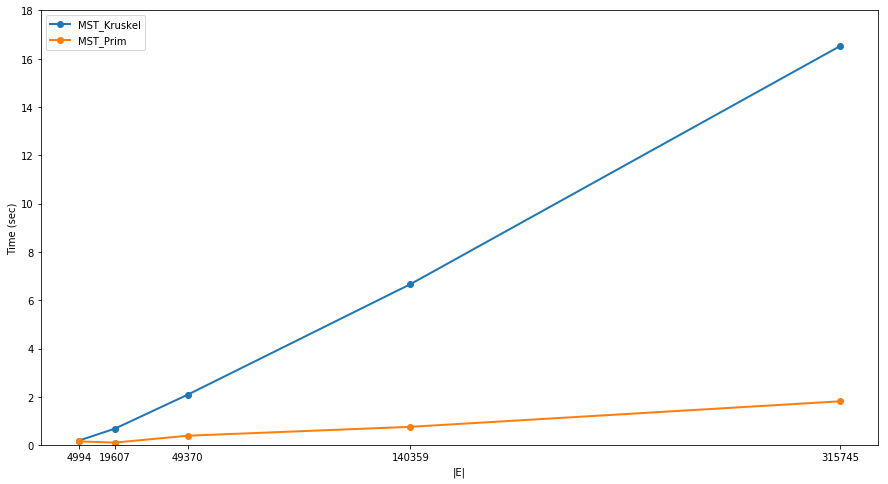

In [64]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,8))
ax = plt.subplot(111)


t = [4994,19607,49370,140359,315745]
kruskel = [
    0.197,
    0.688,
    2.094,
    6.670,
    16.520]

prim = [
    0.161,
    0.112,
    0.397,
    0.765,
    1.820]

line, = plt.plot(t, kruskel, lw=2, marker='o', label="MST_Kruskel")
line2, = plt.plot(t, prim, lw=2, marker='o', label="MST_Prim")

plt.ylim(0,18)
plt.ylabel('Time (sec)')
plt.xlabel('|E|')
plt.xticks(t)
plt.legend()
plt.show()